# Predicting Review rating from review text

# <span style="color:dodgerblue"> Linear Support Vector Machine Algorithm </span>

In [1]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Displaying max-height of 8000 px without scrolling, for cleaner visual representation
# source : stackoverflow
# https://stackoverflow.com/questions/18770504/resize-ipython-notebook-output-window

In [4]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [5]:
%%time

# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

# Dependency: pip install tqdm
from tqdm import tqdm_notebook as tqdm

from collections import Counter

Wall time: 1.08 s


In [6]:
# Loading data-set : reviews dataset with reviews of length 100-200 for restaurants ONLY.

In [7]:
%%time

# col_names = ['review_id', 'business_id', 'user_id', 'text', 'stars', 'text length']

reviews_dataset = pd.read_csv('reviews_restaurants_text.csv', low_memory= False)
display(reviews_dataset.head(3))

,review_id,business_id,user_id,text,stars
0,8oFUMhJ7fR2-X3We9TiK7g,kfo1hXvNtGGThfrZGaWtVw,tL2pS5UOmN6aAOi3Z-qFGg,"b""I've been here a few times over the years. I...",4
1,xryg94pDLOO71veGcQINuQ,dfRAK2mgdHbL2_YsFqtCdQ,tL2pS5UOmN6aAOi3Z-qFGg,"b""I used to come here back in the 90s when thi...",1
2,adNS6X4TnaxuFFxzoezGzg,So132GP_uy3XbGs0KNyzyw,tL2pS5UOmN6aAOi3Z-qFGg,"b""I've eaten here a couple of times. Great foo...",5


Wall time: 773 ms


In [8]:
# reviews_dataset.shape[0] - gives number of row count
print("Total No. of Reviews: {}".format(reviews_dataset.shape[0]))

Total No. of Reviews: 154737


In [9]:
reviews_dataset.shape

(154737, 5)

In [10]:
import string
def get_clean_text(sample_review):
    
    '''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    text = sample_review
    #display(text)
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(sample_review)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    #display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    clean_text = ""
    for word in l:
        clean_text += str(word)+" "
    
    return clean_text.strip()

In [11]:
# TEST 
# get_clean_text()
sample_review = reviews_dataset.text[28]
display(get_clean_text(sample_review))

'clean fresh grade quality sushi ingredients friendly accommodating staff pleasure food go create burrito bowl add wasabi aioli im telling'

In [12]:
import string
def get_words(text):
    
    '''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(sample_review)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    
    return l, len(l)

In [13]:
for i in range(1):
    sample_review = str(reviews_dataset.text[i])
    #display(sample_review)
    check = get_words(sample_review)
    display(check[0]) # a tuple

"i've been here a few times over the years. i'd probably eat here more if i didn't live on the opposite side of town.  i've always enjoyed my experience here and look forward to eating there again."

'ive been here a few times over the years id probably eat here more if i didnt live on the opposite side of town  ive always enjoyed my experience here and look forward to eating there again'

['times',
 'years',
 'probably',
 'eat',
 'live',
 'opposite',
 'side',
 'town',
 'always',
 'enjoyed',
 'experience',
 'look',
 'forward',
 'eating']

In [14]:
pd.set_option('display.precision', 2)
reviews_dataset.describe()

,stars
count,154737.00
mean,4.08
std,1.29
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [15]:
reviews_dataset["stars"].value_counts()
type(reviews_dataset["stars"].value_counts())

5    85332
4    33569
1    14055
3    13382
2     8399
Name: stars, dtype: int64

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x18d2a0ad780>,
  <matplotlib.text.Text at 0x18d2a0eabe0>])

(-1.0098584524766165, 1.0, -1.0197864874675362, 1.0102893450652646)

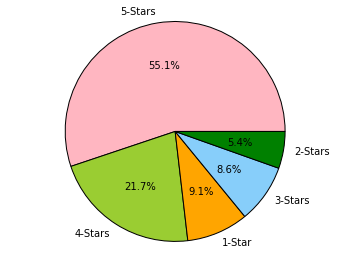

In [16]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["stars"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
 
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%') 
plt.axis('equal')
plt.show()

In [17]:
# Dataset is imbalanced, but it is taken care of by under-sampling when we are using the reviews dataset for recommendations

### Loading clean data into texts list

In [18]:
%%time
# we're interested in the text of each review 
# and the stars rating, so we load these into 
# separate lists

texts = []
stars = [reviews_dataset['stars'] for review in reviews_dataset]
pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    texts.append(get_clean_text(row['text']))
    pbar.update(1)
pbar.close()

A Jupyter Widget


Wall time: 1min 45s


In [19]:
# Vectorizing our Text Data - the TF-IDF algorithm along with n-grams
# and tokenization (splitting the text into individual words).

In [20]:
%%time
# Estimated time: 29.8 s
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,3))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(texts)

Wall time: 25.5 s


## Splitting dataset into Train and test Data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.15, random_state=42, shuffle =False)

In [22]:
# We now have 15% of our data in X_test and y_test. We’ll teach our system using 85%
# of the data (X_train and y_train), and then see how well it does by comparing its predictions for 
# the reviews in X_test with the real ratings in y_test.

## Fitting a Classifier and Making Predictions
The classifier we’ll use is a Linear Support Vector Machine (SVM), 
which has been shown to perform well on several text classifications tasks.

In [23]:
%%time
# Estimated time: 12.6 s
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

Wall time: 15.7 s


In [24]:
# classifier has been fitted, it can now be used to make predictions. 
# predicting the rating for the first ten reviews in our test set

In [25]:
# Using our trained classifier to predict the ratings from text

preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
display(y_test[:5])
print("Predicted Ratings: ",end = "")
print(preds[:5])

Actual Ratings(Stars): 

131526    3
131527    1
131528    3
131529    3
131530    4
Name: stars, dtype: int64

Predicted Ratings: [3 2 4 5 5]


## <span style="color:orangered"> Observations </span>

<b>  Example:
<br> The model predicts a different rating(2) based on features of the review text, for acutal rating index 131527 (which is 1) </b>

In [26]:
# Predicting for entire dataset

X_null, X_full_test, y_null, y_full_test = train_test_split(vectors, stars[1], test_size=0.999995, random_state=42, shuffle = False)
predict_all = classifier.predict(X_full_test)

In [27]:
predicted_stars = list(predict_all)

print("Actual Ratings(Stars): ")
print(y_full_test[154730:154736])
print("\nPredicted Ratings: ",end = "")
print(predicted_stars[154730:154736])

Actual Ratings(Stars): 
154730    5
154731    4
154732    4
154733    3
154734    4
154735    1
Name: stars, dtype: int64

Predicted Ratings: [5, 5, 4, 5, 4, 5]


In [28]:
# Making new CSVs from dataframe

In [29]:
print("\nOriginal Reviews (with user bias)")
display(reviews_dataset.tail(10))

print("\nUnbiased Reviews (with predicted rating using user's review text)")
unbiased_reviews_dataset = reviews_dataset

# dropping actual ratings(stars) by user
unbiased_reviews_dataset = unbiased_reviews_dataset.drop('stars', 1)

# adding the unbiased predicted rating
unbiased_reviews_dataset['stars'] = predicted_stars

display(unbiased_reviews_dataset.tail(10))


Original Reviews (with user bias)


,review_id,business_id,user_id,text,stars
154727,mrZi82Hmgx5UO5gVXLE4Cw,anrLWKAKm3hFLcJpbhEDUg,-Ve_iU4LrfV5hh9Ca8AMkQ,"b""Shane was honestly the funniest and nicest s...",5
154728,zmRR9Sp1um0d2MfyatmUrA,YQ--LJ7pvjiDSqNv0TuKTQ,UBQq6S_FsZQa4J8cS_6Wzw,b'Solid 4-star pizza joint! We had great servi...,4
154729,5aCzF_praG32ikbr4Fj3uw,D8a2usm9b-j89W9IrJ_Evw,Rex_y8h-BRx_Xzc9A6u-_g,"b""I always come here when I'm in Vegas for the...",3
154730,-dr3GveFriZqgw38T1lpMA,rbcfYmJtqwIkk17IeOI5Kw,iI-Tzs2jfDhdOfocBFiLMQ,"b'Great ambiance, excellent cocktails, good se...",5
154731,XIcczbWfDSQoKJBiUEoU2Q,6fPQJq4f_yiq1NHn0fd11Q,IqIpCfg0qDhIkaUJGKzlyw,b'have a crepe in paris :) You can get full of...,4
154732,I1Kt09IdYr6Je9Eikod0jg,hroo5nOO8b9QhHX0GLg7oA,zaasTFLY_SX-2Uj2zlHUmQ,b'Service is fast here n the pho is good along...,4
154733,W5Heng3eRVJJTNVo5gJmSw,DkYS3arLOhA8si5uUEmHOw,AOFDB60pjiXby08lx5HHYQ,"b""Why is this place so highly rated? It's just...",3
154734,ODGDaWgm5gi3NeVDytm9Qw,Xspg78dOvuedvuPEUwZBjw,AOFDB60pjiXby08lx5HHYQ,b'Ordered the extra hot latte. Place is prett...,4
154735,YYMoqTFxli1k9wQceIo_xA,HUKbH7r9TBJPri6LJbBKtw,iXwIKbN2NNlB6QPZwZvrZw,b'All the reviews must be from friends or fami...,1
154736,o-QGNfLQ36FtR-UK5H1TFA,Q7m8G4579-XYKV3LMW8V7g,67tsUtcLuP5mwTFm3-mrzA,"b""Walked across the street from HRH for a late...",4



Unbiased Reviews (with predicted rating using user's review text)


,review_id,business_id,user_id,text,stars
154727,mrZi82Hmgx5UO5gVXLE4Cw,anrLWKAKm3hFLcJpbhEDUg,-Ve_iU4LrfV5hh9Ca8AMkQ,"b""Shane was honestly the funniest and nicest s...",5
154728,zmRR9Sp1um0d2MfyatmUrA,YQ--LJ7pvjiDSqNv0TuKTQ,UBQq6S_FsZQa4J8cS_6Wzw,b'Solid 4-star pizza joint! We had great servi...,4
154729,5aCzF_praG32ikbr4Fj3uw,D8a2usm9b-j89W9IrJ_Evw,Rex_y8h-BRx_Xzc9A6u-_g,"b""I always come here when I'm in Vegas for the...",5
154730,-dr3GveFriZqgw38T1lpMA,rbcfYmJtqwIkk17IeOI5Kw,iI-Tzs2jfDhdOfocBFiLMQ,"b'Great ambiance, excellent cocktails, good se...",5
154731,XIcczbWfDSQoKJBiUEoU2Q,6fPQJq4f_yiq1NHn0fd11Q,IqIpCfg0qDhIkaUJGKzlyw,b'have a crepe in paris :) You can get full of...,5
154732,I1Kt09IdYr6Je9Eikod0jg,hroo5nOO8b9QhHX0GLg7oA,zaasTFLY_SX-2Uj2zlHUmQ,b'Service is fast here n the pho is good along...,4
154733,W5Heng3eRVJJTNVo5gJmSw,DkYS3arLOhA8si5uUEmHOw,AOFDB60pjiXby08lx5HHYQ,"b""Why is this place so highly rated? It's just...",5
154734,ODGDaWgm5gi3NeVDytm9Qw,Xspg78dOvuedvuPEUwZBjw,AOFDB60pjiXby08lx5HHYQ,b'Ordered the extra hot latte. Place is prett...,4
154735,YYMoqTFxli1k9wQceIo_xA,HUKbH7r9TBJPri6LJbBKtw,iXwIKbN2NNlB6QPZwZvrZw,b'All the reviews must be from friends or fami...,5
154736,o-QGNfLQ36FtR-UK5H1TFA,Q7m8G4579-XYKV3LMW8V7g,67tsUtcLuP5mwTFm3-mrzA,"b""Walked across the street from HRH for a late...",5


In [30]:
# write dataframe to csv
file_name = "reviews_restaurants_text_unbiased_svm.csv"
unbiased_reviews_dataset.to_csv(file_name, encoding='utf-8', index=False)

In [31]:
# testing unbiased rating by loading from new csv file

#new_reviews_dataset = pd.read_csv('reviews_restaurants_text_unbiased_svm.csv', low_memory= False)
#display(new_reviews_dataset.tail(10))

## Evaluating our Classifier

In [32]:
# simplest method for evaluating such a system is to see the percentage of the time it accurately predicts the desired answer. 
# This method is unsurprisingly called accuracy. We can calculate the accuracy of our system by comparing the predicted reviews 
# and the real reviews–when they are the same, our classifier predicted the review correctly.
# We sum up all of the correct answers and divide by the total number of reviews in our test set. 
# If this number is equal to 1, it means our classifier was spot on every time.

## <span style="color:orangered"> Accuracy of the model </span>

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.691223988626


In [34]:
# Precision and Recall are better for evaluating rather than using just accuracy measure.

## <span style="color:orangered"> Precision and Recall of the model</span>

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.652086074503
Recall: 0.691223988626


## <span style="color:orangered"> Classification Report </span>

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.69      0.78      0.74      2120
          2       0.45      0.16      0.24      1257
          3       0.52      0.31      0.39      1957
          4       0.48      0.30      0.37      4920
          5       0.75      0.93      0.83     12957

avg / total       0.65      0.69      0.66     23211



## <span style="color:orangered"> Plotting Confusion Metrics </span>

In [37]:
## Helper function for plotting confusion metrics

# citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 1657   116    92    68   187]
 [  467   204   247   156   183]
 [  172   116   601   616   452]
 [   56    12   189  1483  3180]
 [   33     3    26   796 12099]]


Normalized confusion matrix
[[  7.82e-01   5.47e-02   4.34e-02   3.21e-02   8.82e-02]
 [  3.72e-01   1.62e-01   1.96e-01   1.24e-01   1.46e-01]
 [  8.79e-02   5.93e-02   3.07e-01   3.15e-01   2.31e-01]
 [  1.14e-02   2.44e-03   3.84e-02   3.01e-01   6.46e-01]
 [  2.55e-03   2.32e-04   2.01e-03   6.14e-02   9.34e-01]]


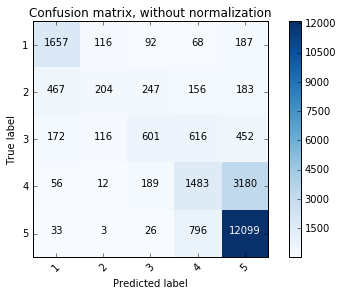

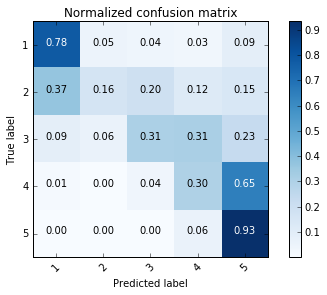

In [38]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# <span style="color:dodgerblue"> Predicting  positive and negative sentiments </span>

In [39]:
# making binary classes
sentiments = []
for star in stars[1]:
    if star <= 3:
        sentiments.append('n')
    if star > 3:
        sentiments.append('p')

print(len(sentiments))        
        
## to see the effect without including 3, we need to undersample

154737


In [40]:
%%time

X2_train, X2_test, y2_train, y2_test = train_test_split(vectors, sentiments, test_size=0.20, random_state=42)

Wall time: 441 ms


In [41]:
%%time

classifier2 = LinearSVC()
# train the classifier
classifier2.fit(X2_train, y2_train)

Wall time: 2.46 s


In [42]:
preds2 = classifier2.predict(X2_test)
print("Actual Class:    ",end = "")
print(y2_test[:10])
print("\nPredicted Class: ",end = "")
print(list(preds2[:10]))

Actual Class:    ['p', 'p', 'n', 'p', 'n', 'p', 'p', 'p', 'p', 'n']

Predicted Class: ['p', 'p', 'n', 'p', 'n', 'p', 'p', 'p', 'n', 'p']


## Evaluating our Binary Classifier

## <span style="color:orangered"> Accuracy of the model </span>

In [43]:
print(accuracy_score(y2_test, preds2))

0.926231097325


## <span style="color:orangered"> Precision and Recall of the model</span>

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y2_test, preds2, average='weighted')))
print ('Recall: ' + str(recall_score(y2_test, preds2, average='weighted')))

Precision: 0.92486379599
Recall: 0.926231097325


## <span style="color:orangered"> Classification Report </span>

In [45]:
print(classification_report(y2_test, preds2))

             precision    recall  f1-score   support

          n       0.89      0.77      0.83      7032
          p       0.93      0.97      0.95     23916

avg / total       0.92      0.93      0.92     30948



## <span style="color:orangered"> Plotting Confusion Metrics </span>

In [46]:
print(metrics.confusion_matrix(y2_test, preds2))

[[ 5415  1617]
 [  666 23250]]


Confusion matrix, without normalization
[[ 5415  1617]
 [  666 23250]]


Normalized confusion matrix
[[ 0.77  0.23]
 [ 0.03  0.97]]


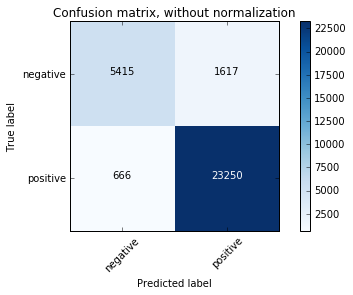

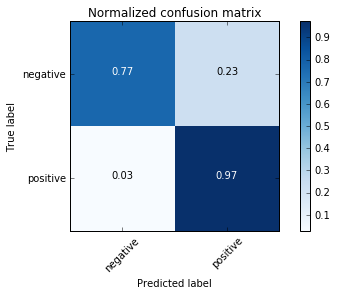

In [47]:
class_names = ['negative','positive']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y2_test, preds2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()